There are 25 variables:

ID: ID of each client
LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)
SEX: Gender (1=male, 2=female)
EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
MARRIAGE: Marital status (1=married, 2=single, 3=others)
AGE: Age in years
PAY_0:Repayment status in September, 2005 (-2=no consumption, -1=pay duly, 0=the use of revolving credit, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
PAY_2: Repayment status in August, 2005 (scale same as above)
PAY_3: Repayment status in July, 2005 (scale same as above)
PAY_4: Repayment status in June, 2005 (scale same as above)
PAY_5: Repayment status in May, 2005 (scale same as above)
PAY_6: Repayment status in April, 2005 (scale same as above)
BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
default.payment.next.month: Default payment (1=yes, 0=no)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as pl

In [2]:
data=pd.read_csv(r"C:\Users\deyar\OneDrive\Desktop\CreditCardDefaultPrediction\notebooks\data\UCI_Credit_Card.csv")

In [3]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [5]:
num_col=["LIMIT_BAL","AGE","BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4",
     "BILL_AMT5","BILL_AMT6","PAY_AMT1","PAY_AMT2","PAY_AMT3","PAY_AMT4",
     "PAY_AMT5","PAY_AMT6"]
cat_col=['SEX','EDUCATION','MARRIAGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']

In [6]:
data_num=data[num_col]

In [7]:
data_cat=data[cat_col]

In [8]:
y=data["default.payment.next.month"]

In [9]:

y=pd.DataFrame(y,columns=["default.payment.next.month"])

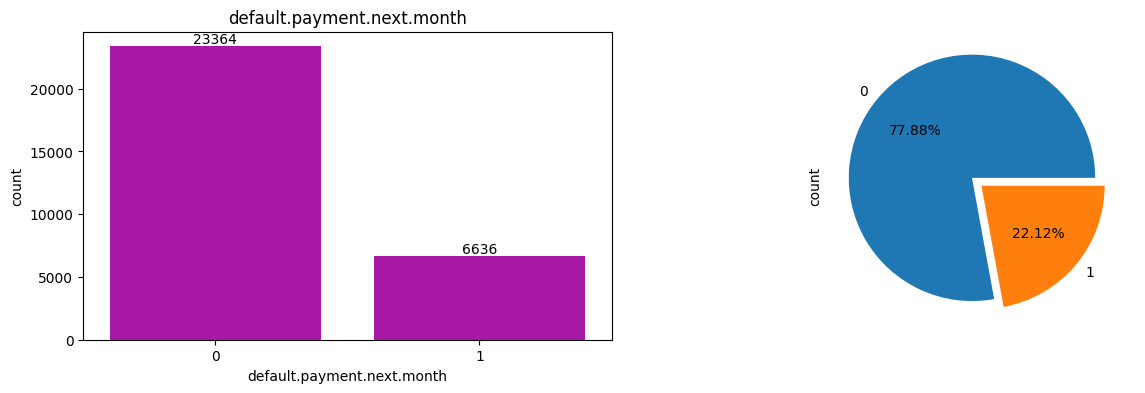

In [10]:
pl.figure(figsize=(15,4))
pl.subplot(1,2,1)
a=sn.countplot(data=data,x="default.payment.next.month",color="m")
for i in a.containers:
    a.bar_label(i)
pl.title("default.payment.next.month") 
pl.subplot(1,2,2)
data["default.payment.next.month"].value_counts().plot(kind="pie",autopct="%.2f%%",explode=[.1,0])  
pl.show()

here no of card defaulter is very less.

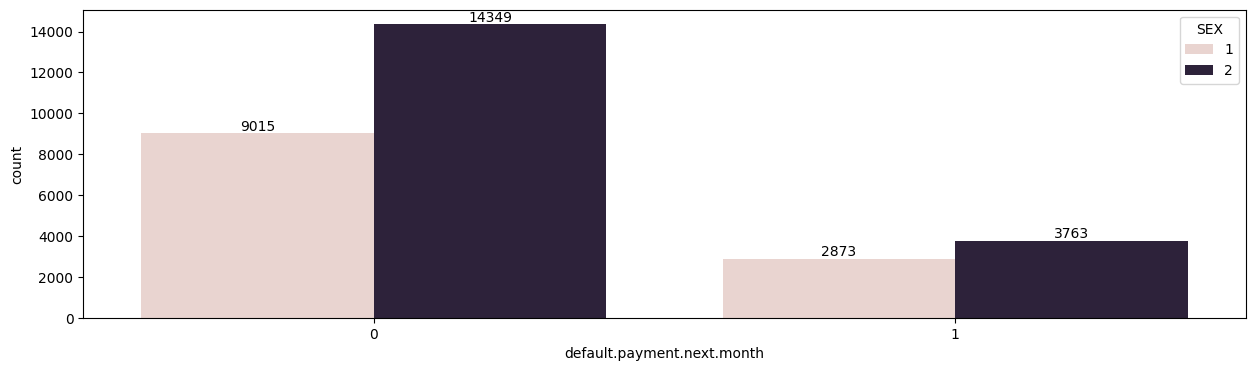

In [11]:
pl.figure(figsize=(15,4))
a=sn.countplot(data=data,x="default.payment.next.month",hue="SEX")
for i in a.containers:
    a.bar_label(i)

max no of cards has been used by female.

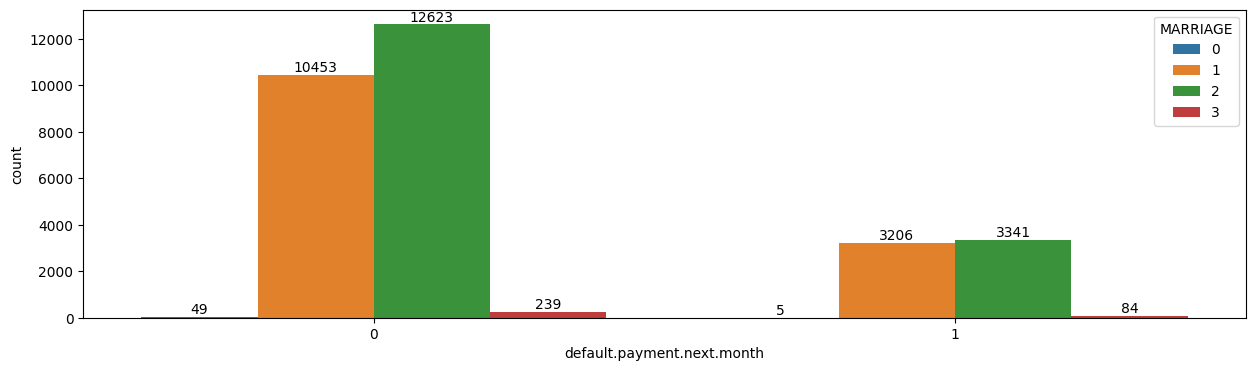

In [12]:
pl.figure(figsize=(15,4))
a=sn.countplot(data=data,x="default.payment.next.month",hue="MARRIAGE",palette="tab10")
for i in a.containers:
    a.bar_label(i)

max no of cards has been used which marital status is single

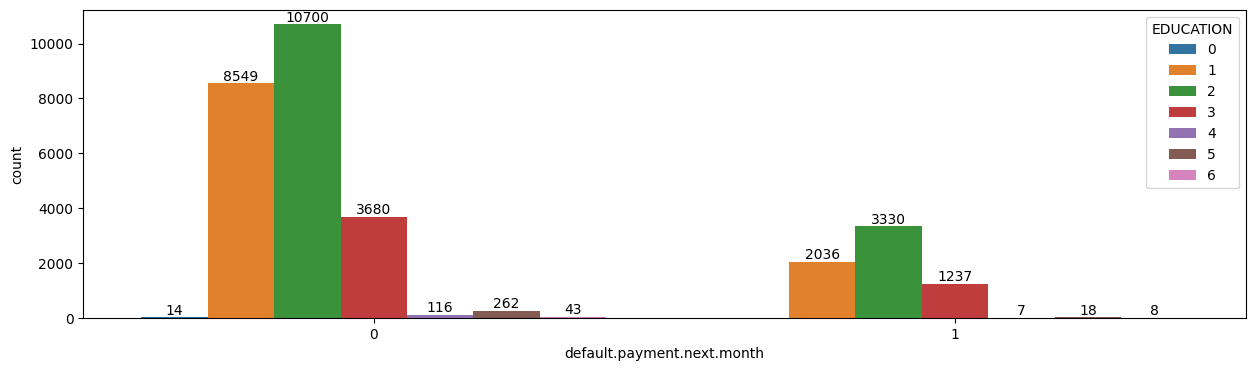

In [13]:
pl.figure(figsize=(15,4))
a=sn.countplot(data=data,x="default.payment.next.month",hue="EDUCATION",palette="tab10")
for i in a.containers:
    a.bar_label(i)

who have educational status is university ,they have used max no of cards.

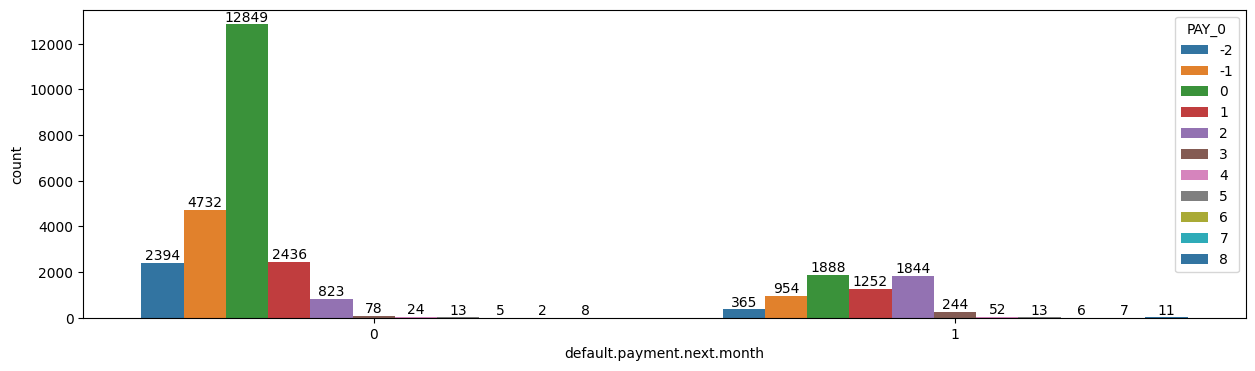

In [14]:
pl.figure(figsize=(15,4))
a=sn.countplot(data=data,x="default.payment.next.month",hue="PAY_0",palette="tab10")
for i in a.containers:
    a.bar_label(i)

Repayment status in September, 2005   0=the use of revolving credit has max no.

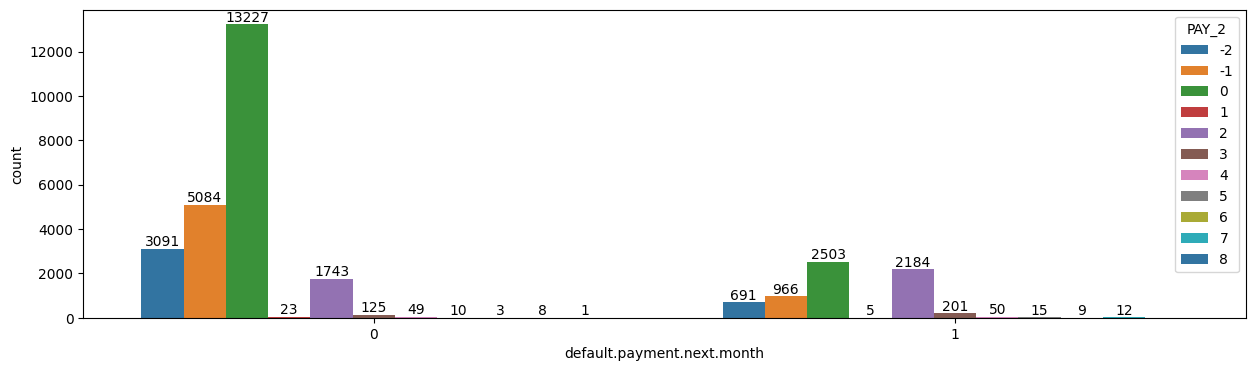

In [15]:
pl.figure(figsize=(15,4))
a=sn.countplot(data=data,x="default.payment.next.month",hue="PAY_2",palette="tab10")
for i in a.containers:
    a.bar_label(i)

Repayment status in august, 2005   0=the use of revolving credit has max no.

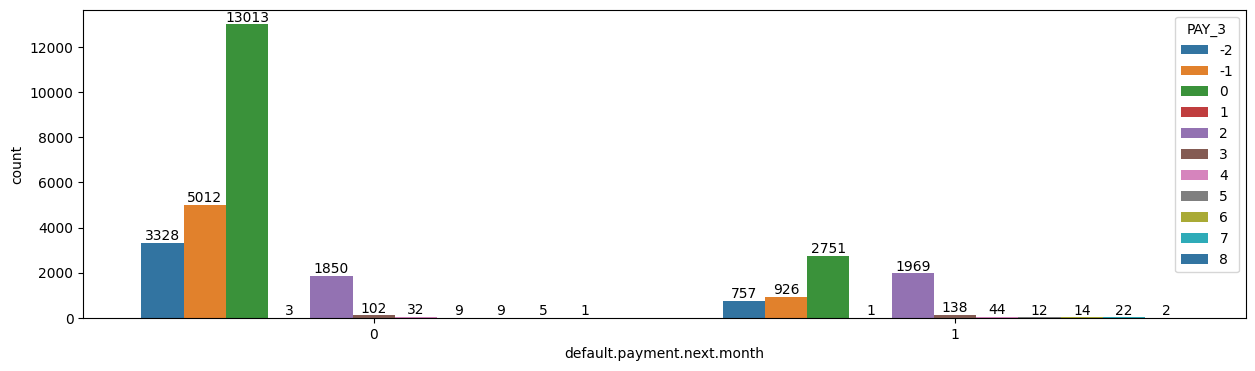

In [16]:
pl.figure(figsize=(15,4))
a=sn.countplot(data=data,x="default.payment.next.month",hue="PAY_3",palette="tab10")
for i in a.containers:
    a.bar_label(i)

Repayment status in july, 2005   0=the use of revolving credit has max no.

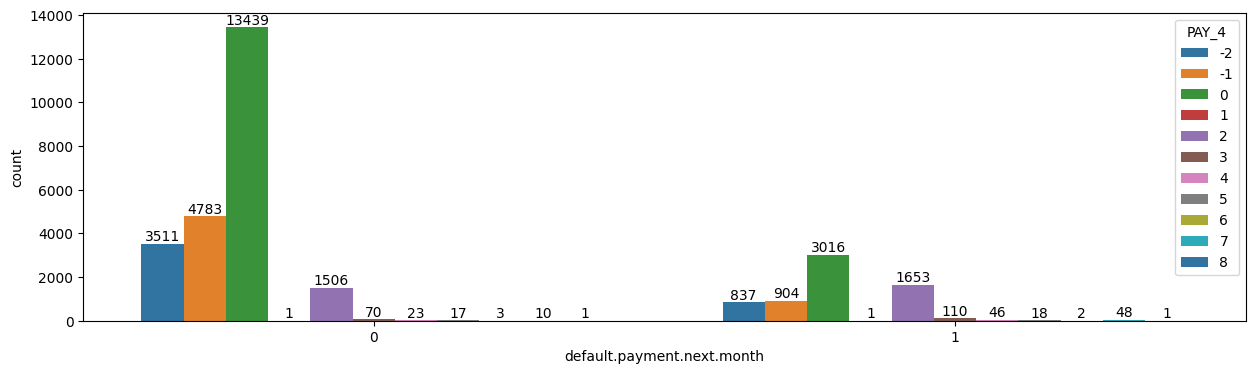

In [17]:
pl.figure(figsize=(15,4))
a=sn.countplot(data=data,x="default.payment.next.month",hue="PAY_4",palette="tab10")
for i in a.containers:
    a.bar_label(i)

Repayment status in june, 2005   0=the use of revolving credit has max no.

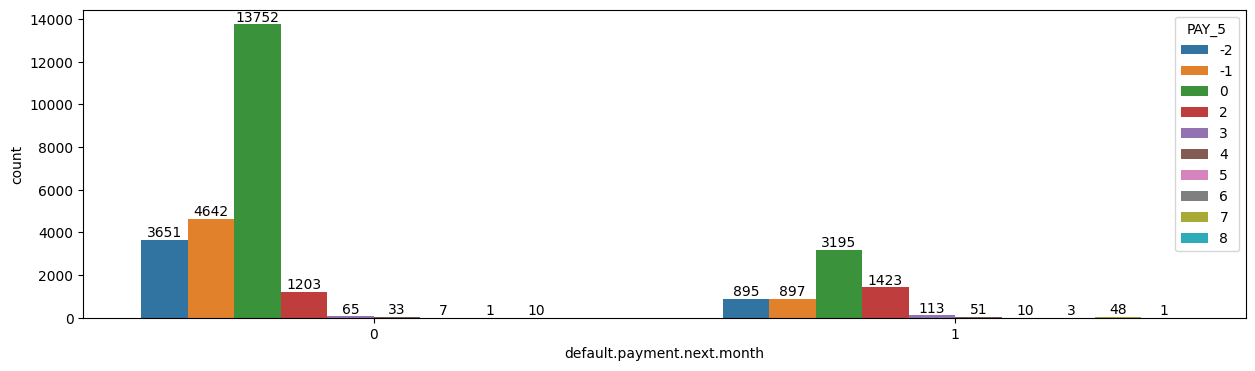

In [18]:
pl.figure(figsize=(15,4))
a=sn.countplot(data=data,x="default.payment.next.month",hue="PAY_5",palette="tab10")
for i in a.containers:
    a.bar_label(i)

Repayment status in may, 2005   0=the use of revolving credit has max no.

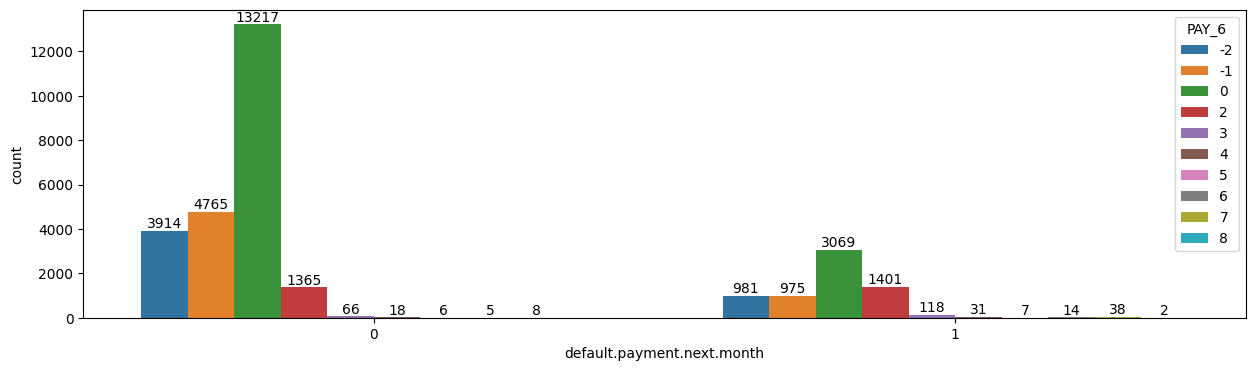

In [19]:
pl.figure(figsize=(15,4))
a=sn.countplot(data=data,x="default.payment.next.month",hue="PAY_6",palette="tab10")
for i in a.containers:
    a.bar_label(i)

Repayment status in may, 2005   0=the use of revolving credit has max no.

In [20]:
y_col=y.columns[0]

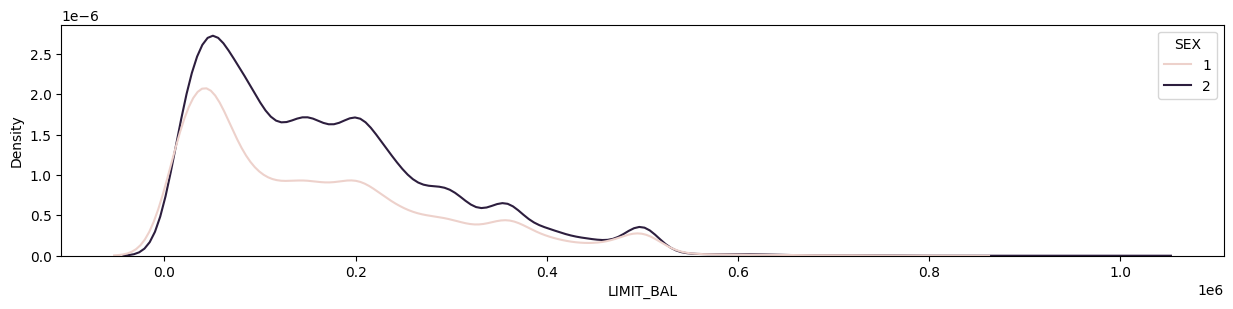

In [21]:
pl.figure(figsize=(15,3))
sn.kdeplot(data=data,x="LIMIT_BAL",hue="SEX")
pl.show()

females are having high card card limit

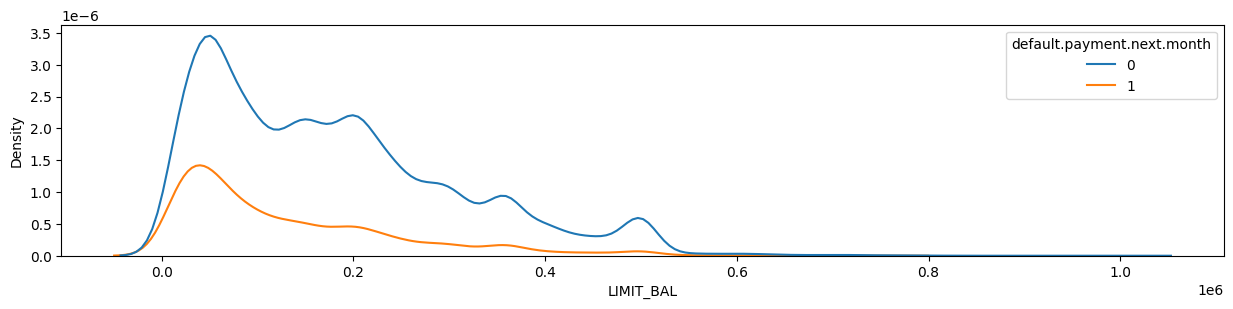

In [22]:
pl.figure(figsize=(15,3))
sn.kdeplot(data=data,x="LIMIT_BAL",hue=y_col)
pl.show()

max no of defaulters came from who have low borrowing capacity

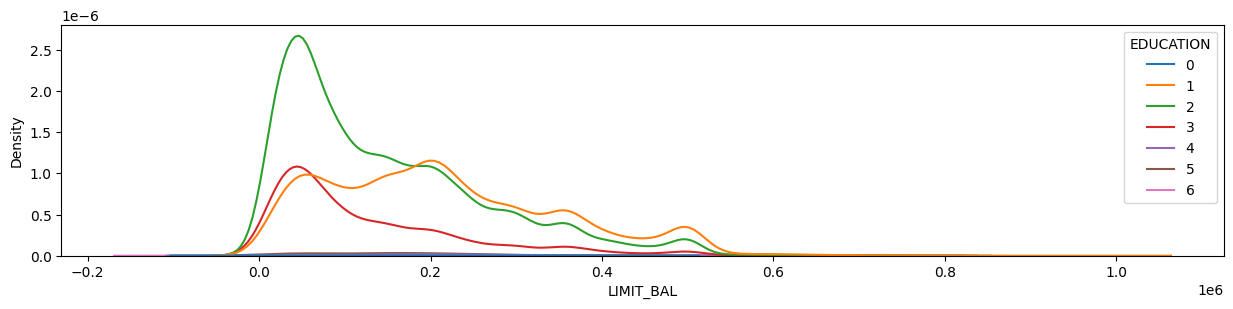

In [23]:
pl.figure(figsize=(15,3))
sn.kdeplot(data=data,x="LIMIT_BAL",hue="EDUCATION",palette="tab10")
pl.show()

1=graduate school is having high borrowing limit

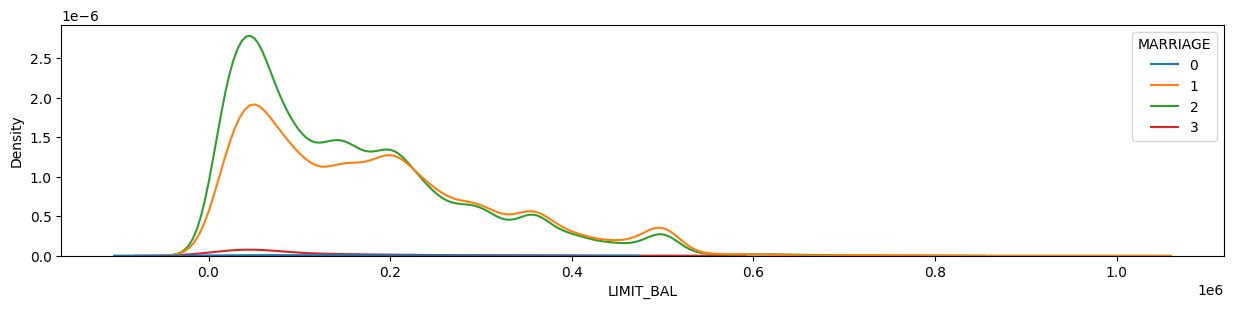

In [24]:
pl.figure(figsize=(15,3))
sn.kdeplot(data=data,x="LIMIT_BAL",hue="MARRIAGE",palette="tab10")
pl.show()

married people has high borrowing limit

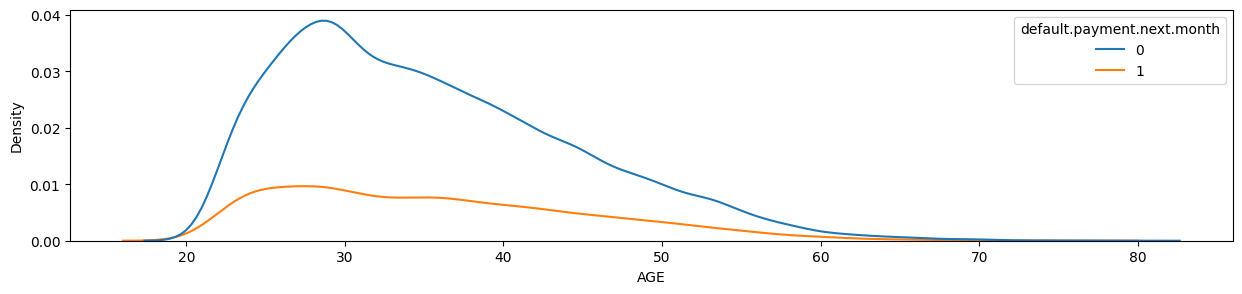

In [25]:
pl.figure(figsize=(15,3))
sn.kdeplot(data=data,x="AGE",hue=y_col,palette="tab10")
pl.show()

who are having age between 28-32 ,they default most

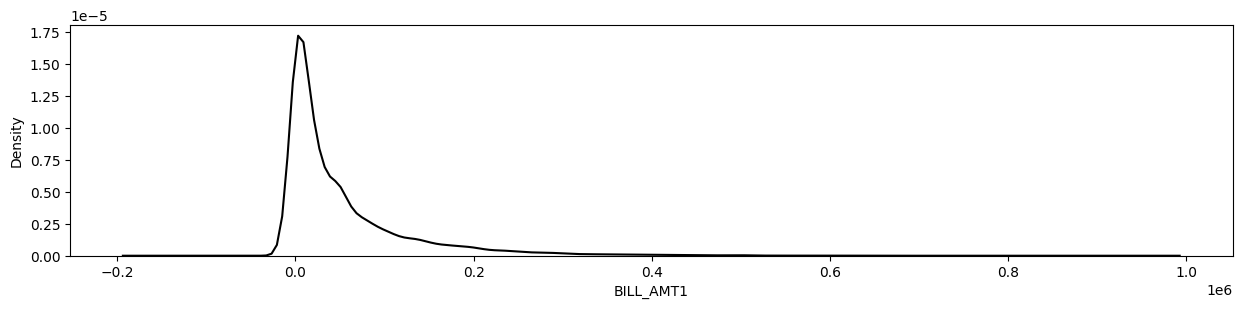

In [26]:
pl.figure(figsize=(15,3))
sn.kdeplot(data=data,x="BILL_AMT1",color="k")
pl.show()

In [27]:
data_num.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,24,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,34,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,37,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,57,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [28]:
pip install sweetviz

  Using cached sweetviz-2.3.1-py3-none-any.whl.metadata (24 kB)
  Using cached importlib_resources-6.4.0-py3-none-any.whl.metadata (3.9 kB)
Using cached sweetviz-2.3.1-py3-none-any.whl (15.1 MB)
Using cached importlib_resources-6.4.0-py3-none-any.whl (38 kB)
Note: you may need to restart the kernel to use updated packages.


In [29]:
import sweetviz as swv

c:\Users\deyar\OneDrive\Desktop\CreditCardDefaultPrediction\myenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [30]:
myreport=swv.analyze(data)
myreport.show_html()

Feature: ID                                  |▍         | [  4%]   00:00 -> (00:00 left)

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:02 -> (00:00 left)


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [31]:
data_num.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,24,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,34,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,37,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,57,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


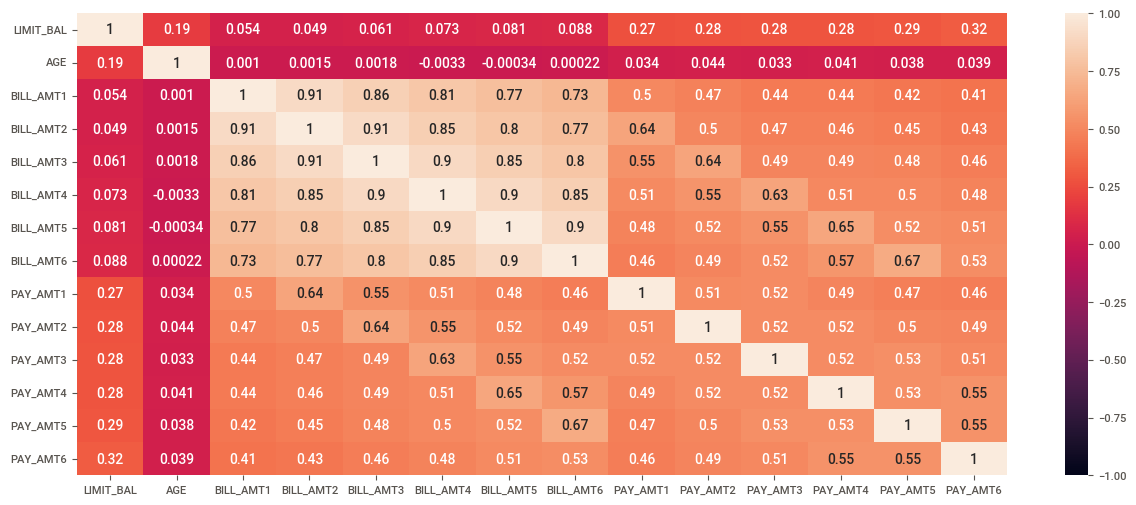

In [32]:
pl.figure(figsize=(15,6))
sn.heatmap(data_num.corr(method='spearman'),annot=True,vmax=1,vmin=-1)
pl.show()

BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6 highly correalated	